In [5]:
#importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [6]:
#getting the data
data=pd.read_csv('student_info.csv')

## Let's see some insights from the data


In [7]:
data.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [9]:
data.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

As we can see there are 5 null values in the data here. So, that needs to be taken care of.

In [10]:
data.shape

(200, 2)

## Removing the null values with mean

In [11]:
data['study_hours'].fillna((data['study_hours'].mean()), inplace=True) #filling up the null values

In [12]:
data.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

### Now we don't have any missing values , and we're ready to work with the Data!

In [13]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    200 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


## Machine Learning

In [14]:
#time to split the dataset, X is the target variable and y is the input variable
X=data[['student_marks']]
y=data[['study_hours']]
print("shape of X = ", X.shape)
print("shape of y = ", y.shape)

shape of X =  (200, 1)
shape of y =  (200, 1)


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.33, random_state=1)
print("shape of X_train = ", X_train.shape)
print("shape of y_train = ", y_train.shape)
print("shape of X_test = ", X_test.shape)
print("shape of y_test = ", y_test.shape)

shape of X_train =  (134, 1)
shape of y_train =  (134, 1)
shape of X_test =  (66, 1)
shape of y_test =  (66, 1)


#### As the data requires a regression model, here I am choosing a simple Linear Regression model.


In [17]:
#choosing a model
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [18]:
#now its time to fit the modell using the train datasets
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
print('coefficiets: ' , lr.coef_)
print('intercepts: ', lr.intercept_)

coefficiets:  [[0.24463003]]
intercepts:  [-12.09370995]


In [20]:
#lets see the predictions
pred=lr.predict(X_test)

In [22]:
pd.DataFrame(np.c_[X_test, y_test, pred], columns = ["study_hours", "student_marks_original","student_marks_predicted"])

,study_hours,student_marks_original,student_marks_predicted
0,70.90,5.39,5.250559
1,70.27,5.28,5.096443
2,83.08,8.72,8.230153
3,82.99,8.26,8.208137
4,71.50,5.22,5.397337
...,...,...,...
61,81.70,8.26,7.892564
62,70.05,5.09,5.042624
63,71.10,5.46,5.299485
64,85.11,8.44,8.726752


In [23]:
#lets test the score
lr.score(X_test,y_test)

0.9497542145612995

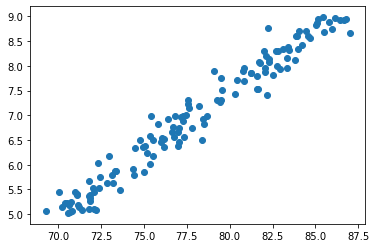

In [83]:
plt.scatter(X_train,y_train)
plt.show()

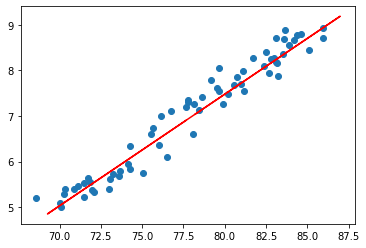

In [85]:
plt.scatter(X_test,y_test)
plt.plot(X_train,lr.predict(X_train),color='r')

## Finally we can see our Regression line, which looks pretty good